In [38]:
import pandas as pd

In [39]:
data_path = "D:/CSIT/Sixth/Python/data/diabetes.csv"

In [40]:
data = pd.read_csv(data_path)

In [41]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [43]:
data.isna().sum()
# if null -> (remove or fill)


Pregnancies                 0
Glucose                     0
BloodPressure               1
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [44]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,767.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.091265,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.364432,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
data.duplicated().sum()

np.int64(0)

In [46]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [47]:
# to fill null data (if bloodpressure has 1 null value)
bp_median = data['BloodPressure'].median()

In [48]:
data['BloodPressure'].fillna(bp_median, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15976\4986602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BloodPressure'].fillna(bp_median, inplace=True)


In [49]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

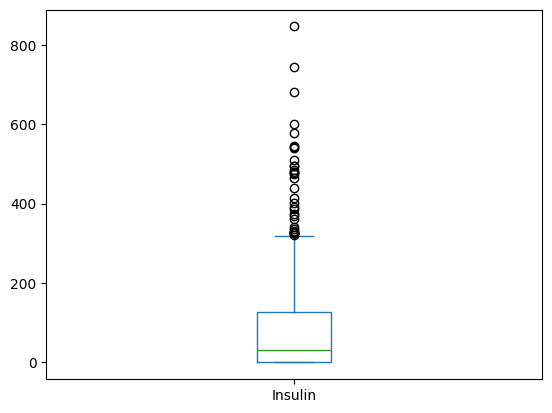

In [50]:
data['Insulin'].plot.box()

In [51]:
q1 = data['Insulin'].quantile(0.25)
q3 = data['Insulin'].quantile(0.75)

insulin_iqr = q3 - q1

upper_limit = val \
  if (val:= q3 + 1.5 * insulin_iqr) < data['Insulin'].max() \
  else data['Insulin'].max()
lower_limit = (val 
  if (val := q1 - 1.5 * insulin_iqr) >= data['Insulin'].min() 
  else 0) 
# insulin cannot be negative

data['Insulin'].min(), lower_limit, upper_limit, data['Insulin'].max()

(np.int64(0), 0, np.float64(318.125), np.int64(846))

In [52]:
import numpy as np

feature_insulin = data['Insulin'].to_numpy()
# like ternary operator
list(np.where(
  (feature_insulin > upper_limit) | (feature_insulin < lower_limit),
  -1,
  feature_insulin
)).count(-1)

34

In [53]:
# number of insulin values above upper limit
n_above_upper_limit = data['Insulin'][
  data['Insulin'] > upper_limit
].count()

# number of insulin values below lower limit
n_below_lower_limit = data['Insulin'][
  data['Insulin'] < lower_limit
].count()

n_above_upper_limit + n_below_lower_limit

np.int64(34)

In [54]:
sum(data['Insulin'] > upper_limit)

34

In [55]:
sum(data['Insulin'] < lower_limit)

0

In [56]:
sum(data['Insulin'] > upper_limit) + sum(data['Insulin'] < lower_limit)

34

In [57]:
data[
  data['Insulin'] > 800
]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60.0,23,846,30.1,0.398,59,1


In [58]:
data['Insulin'][
  data['Insulin'] > 800
]

13    846
Name: Insulin, dtype: int64

In [59]:
# outlier detection
data = data[
  data['Insulin'] <= upper_limit
][data['Insulin'] >= lower_limit]

C:\Users\Dell\AppData\Local\Temp\ipykernel_15976\1782462369.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[


In [60]:
data.shape

(734, 9)

In [61]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0


In [62]:
# DIABETES:
# 1 -> positive (yes)
# 0 -> negative (no)

In [63]:
X = data.drop('Outcome', axis = 1)
y = data ['Outcome']

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (
  X, y, train_size=0.8, random_state=42
)

In [65]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [67]:
  
def classification_metrics(y_test, predictions, name): 
  acc = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)
  f1 = f1_score(y_test, predictions)
  
  print(f"For {name} algorithm:\n")
  print(f"{acc = }, \n{precision = }, \n{recall = }, \n{f1 = }")
  
classification_metrics(y_test, predictions, "Logistic Regression")

For Logistic Regression algorithm:

acc = 0.7414965986394558, 
precision = np.float64(0.6388888888888888), 
recall = np.float64(0.4791666666666667), 
f1 = np.float64(0.5476190476190477)


In [68]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)
predictions = classifier_dt.predict(X_test)

In [69]:
classification_metrics(y_test, predictions, "Decision Tree Classifier")

For Decision Tree Classifier algorithm:

acc = 0.7074829931972789, 
precision = np.float64(0.5490196078431373), 
recall = np.float64(0.5833333333333334), 
f1 = np.float64(0.5656565656565656)


In [75]:
classifier_dt = DecisionTreeClassifier(max_depth=10) # difficult to manually tune hyperparameter
classifier_dt.fit(X_train, y_train)
predictions = classifier_dt.predict(X_test)
classification_metrics(y_test, predictions, "Decision Tree Classifier 2")

For Decision Tree Classifier 2 algorithm:

acc = 0.7687074829931972, 
precision = np.float64(0.6458333333333334), 
recall = np.float64(0.6458333333333334), 
f1 = np.float64(0.6458333333333334)


In [71]:
from sklearn.svm import SVC

classifier_svc = SVC()
classifier_svc.fit(X_train, y_train)
predictions = classifier_svc.predict(X_test)
classification_metrics(y_test, predictions, "SVC Classifier")

For SVC Classifier algorithm:

acc = 0.7142857142857143, 
precision = np.float64(0.59375), 
recall = np.float64(0.3958333333333333), 
f1 = np.float64(0.475)


``` Try```

In [1]:
# Import necessary libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0  # Normalize pixel values to [0, 1]
x_test = x_test / 255.0

y_train = to_categorical(y_train, num_classes=10)  # One-hot encoding
y_test = to_categorical(y_test, num_classes=10)

# Build a simple neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),          # Flatten 28x28 images to 1D vector
    Dense(128, activation='relu'),          # Hidden layer with 128 neurons
    Dense(10, activation='softmax')         # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
print("Training the model...")
model.fit(x_train, y_train, epochs=2, batch_size=32, verbose=1)

# Evaluate the model
print("Evaluating the model...")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


d:\CSIT\Sixth\Python\virtual\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training the model...
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8740 - loss: 0.4349
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9653 - loss: 0.1193
Evaluating the model...
Test Loss: 0.1029
Test Accuracy: 0.9683


In [2]:
import keras
import tensorflow
import torch